# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [4]:
cc_data= pd.read_csv('creditcard.csv')
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset Information

In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking for missing values

In [6]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# distribution legit and fraudient transaction
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Defining Fraud/Legit Transaction


In [8]:
legit = cc_data[cc_data.Class == 0]
fraud = cc_data[cc_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


Description of Legit Transaction

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Description of Fraud Transaction

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
# compare the values of transactions
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Data Visualisation

Text(0, 0.5, 'Mean Transcation Amount')

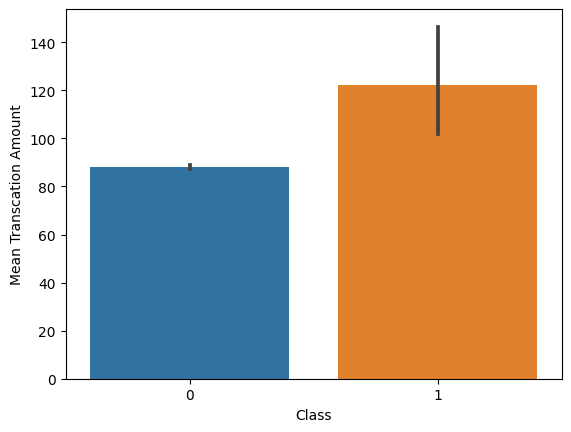

In [12]:
sns.barplot(data=cc_data ,x='Class', y='Amount')
plt.ylabel('Mean Transcation Amount')

In [13]:
cc_data.iloc[:, 1:30] = StandardScaler().fit_transform(cc_data.iloc[:, 1:30])
data_matrix = cc_data.values

x = data_matrix[:, 1:30]

y = data_matrix[:, 30]

x = normalize(x, norm="l2")

print('x.shape=', x.shape, 'y.shape=', y.shape)

x.shape= (284807, 29) y.shape= (284807,)


Splitting the dataset into train data and test data

In [14]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 2, stratify=y)
print(x.shape)
print("x_train shape: " ,x_train.shape, "x_test shape: ", x_test.shape)
print("y_train shape: " ,y_train.shape, "y_test shape: ", y_test.shape)

(284807, 29)
x_train shape:  (227845, 29) x_test shape:  (56962, 29)
y_train shape:  (227845,) y_test shape:  (56962,)


Calculating and plotting Correlation Matrix

<Axes: >

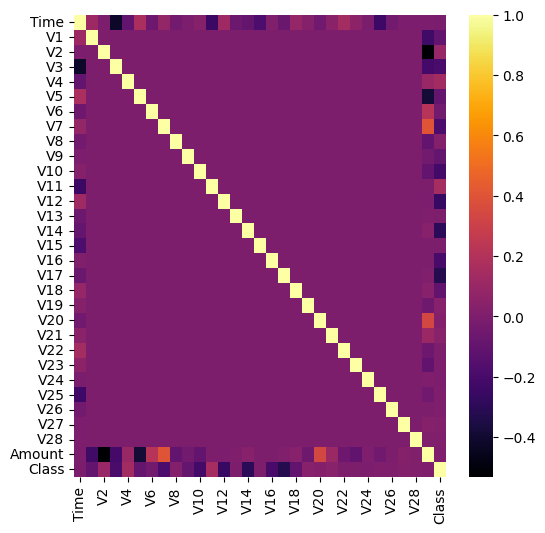

In [15]:
corr = cc_data.corr()
figure = plt.figure(figsize = (6, 6))
sns.heatmap(corr, cmap='inferno')

# Building Models

Random Forest Classifier and Logistic Regression

In [16]:
method_name=[]
method_scores=[]

models={
         'Logistic Regression': LogisticRegression(),
         'Random Forest': RandomForestClassifier()
       }

for name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  score = accuracy_score(y_pred, y_test)
  method_name.append(name)
  method_scores.append(score)

In [17]:
results = pd.DataFrame({'model': method_name, 'score': method_scores})

results.sort_values(by='score', ascending=False)

,model,score
1,Random Forest,0.999491
0,Logistic Regression,0.999421


Clearly, Random forest has more accuracy 

Defining random forest

In [18]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

score = accuracy_score(y_pred, y_test)

print(score)

0.9994908886626171


Performance evaluation

In [19]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# Undersampling/ Oversampling

Undersampling and oversampling involve introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is either already present in the data or likely to develop if a purely random sample were taken.

Applying Random Forest supervised classification.

In [20]:
# Apply Random Under-Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
x_train_resampled, y_train_resampled = rus.fit_resample(x_train, y_train)

# Apply Random Over-Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

In [21]:
# Train a Random Forest Classifier on the resampled data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9995611109160493
Confusion Matrix:
[[56857     7]
 [   18    80]]


Performance re-evaluation

In [22]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56864
         1.0       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



# Confusion Matrix

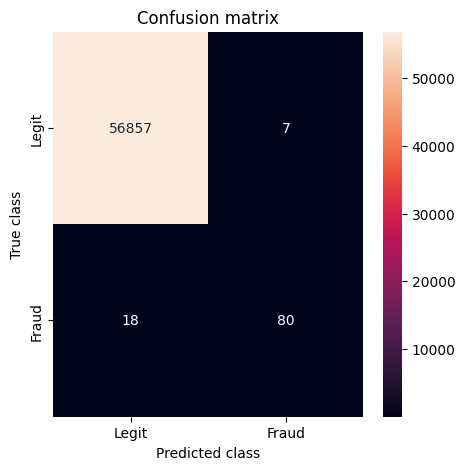

In [23]:
LABEL = ['Legit', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(5, 5))
sns.heatmap(conf_matrix, xticklabels = LABEL, yticklabels = LABEL, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()